# Steps for Project

1. Create and Check Spark Context for Pyspark shell.
2. Load necessary libraries
3. Check the informtion provided about data.
4. Import the data files provided from HDFS (Churn.csv and Churntest.csv).
5. Display the data in Spark Dataframe. ( Note:: In pyspark, dataframe index the rows from 0 instead of 1)
6. Do data pre-processing required.( Hint - We have some variables which should be of categorical datatype but they are of type integer. Convert them)
7. Do exploratory data analysis.
            7.1 - Describe the data using describe function and state your insights.
            7.2 - Create Histogram for Day minutes spent by customers for churn=0 and 1 values.
            7.3 - Create count plots for Number of customers opt voicemail plan with Churn values.
            7.4 - Create count plots for International Plan opt by customer with Churn values.
            7.5 - Plot Areawise churner and non-churner.
            7.6 - Get correlation matrix using corr() function.
8. Get correlation between Predicting Variable and independent variable and state your insights.
    (Now that we want to predict which customer is going to churn, let’s see what columns might be         interesting for our prediction.One way is to find the correlation between "Churn" and each of         the other columns.This will show us which other columns might predict "Churn" the best.)
9. Applying Machine Learning Model
            9.1 - Import necessary libraries
            9.2 - Create vectors of all indepandant variables (Hint - use VectorAssembler)
            9.3 - Apply Decision Tree Classifier using dependent and independent variables.
            9.4 - Create pipeline to build the classifier.
            9.5 - Use startified sampling to get a sample of data.
            9.6 - Split the data into train and test dataset.
            9.7 - Make predictions and validate your model by calculating accuracy score.
            9.8 - Calculate recall and precision score.
            9.9 - Test the model using test data and calculate accuracy, recall and precision.
            9.10- Repeat steps from 9.3 to 9.9 for Random-forest and Gradient-Boost Classifiers.
10. State your insights and conclusions from the above analysis.
            

# About the Data

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account.Length: how long account has been active.

VMail.Message: Number of voice mail messages send by the customer.

Day.Mins: Time spent on day calls.

Eve.Mins: Time spent on evening calls.

Night.Mins: Time spent on night calls.

Intl. Mins: Time spent on international calls.

Day.Calls: Number of day calls by customers.

Eve.Calls: Number of evening calls by customers.

Intl.Calls: Number of international calls.

Night.Calls: Number of night calls by customer.

Day.Charge: Charges of Day Calls.

Night.Charge: Charges of Night Calls.

Eve.Charge: Charges of evening Calls.

Intl.Charge: Charges of international calls.

VMail.Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area.Code: Area Code of customer.

Int.l.Plan: Does customer have international plan or not.

CustServ.Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)

# Get started 

# Loading the Data and Pre-Processing

#### Loading Libraries

In [1]:
##We have to load libraries before we start our analysis.

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext, SparkConf, SQLContext
import seaborn as sns

from pyspark.ml.feature import StringIndexer

In [2]:
import os

os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk1.8.0_202'

conf = SparkConf().set('spark.driver.host', '127.0.0.1')
sc = SparkContext(master='local', appName='myAppName', conf=conf)
spark = SQLContext(sc)

### Import the Data

We have training file contains 3333 observations with 21 variables and testing file contains  667 observations. 

In [3]:
import databricks.koalas as ks
df = ks.read_csv("Churn.csv")

### Display the dataframe
### Note:: In pyspark, dataframe index the rows from 0 instead of 1.   

 

In [4]:
df.head(5)

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
df.info()

<class 'databricks.koalas.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
AccountLength    3333 non-null int32
VMailMessage     3333 non-null int32
DayMins          3333 non-null float64
EveMins          3333 non-null float64
NightMins        3333 non-null float64
IntlMins         3333 non-null float64
CustServCalls    3333 non-null int32
Churn            3333 non-null int32
IntlPlan         3333 non-null int32
VMailPlan        3333 non-null int32
DayCalls         3333 non-null int32
DayCharge        3333 non-null float64
EveCalls         3333 non-null int32
EveCharge        3333 non-null float64
NightCalls       3333 non-null int32
NightCharge      3333 non-null float64
IntlCalls        3333 non-null int32
IntlCharge       3333 non-null float64
State            3333 non-null object
AreaCode         3333 non-null int32
Phone            3333 non-null object
dtypes: float64(8), int32(11), object(2)

In [6]:
df['Phone'].nunique()

3333

Phone column has 3333 unique values which tells us that it is a index variable and should be omitted from analysis

# Exploratory Data Analysis

#### Summary of Dataframe

In pyspark we use 'describe()' to display the summary of variables in dataframe. Also the describe variables doesn't
show the summary of categorical variables in dataframe. We have to explore them explicitly.

In [7]:
df.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


From the obtained table we find that, summary of dataframe  includes-

**count**- displaying the number of observations in each variable.

**mean**- the mean value around which each observation lies.

**std**- standard deviation; Its a measure of how much close to the mean value the actual data points are.

**min and max**- displays the maximum and minimum value of a variable in dataframe. e.g. in variable account length the
                 service used by people for minimum 1 day and maximum for 243 days. 

**25%**- it shows the first quartile of variable e.g. if we look at the Account Length then it means 25% of the people used
         service for 74 days, similarly for other variables.

**50%**- it shows second quartile of variable e.g. in the vaiable Account Length then it means 50% of the people used service            for 101 days. 

**75%**- shows the third quartile and 75% of people used service for 127 days. 

#### Histogram for Day minutes spent by customers

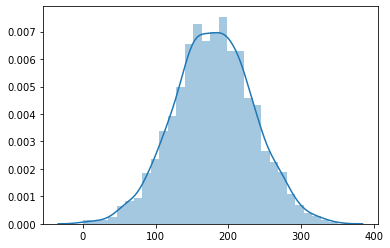

In [8]:
sns.distplot(df['DayMins'].to_numpy(),bins=30,)

The histogram shows that total day minutes spent by customers on day minutes during their service period.

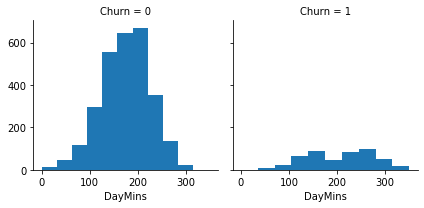

In [9]:
g = sns.FacetGrid(df.to_pandas(), col="Churn")
g.map(plt.hist, "DayMins")

In the above plot **churn=0** shows **non-churner** and **churn=1** shows **churner**. 

#### Number of customers opt voice mail plan

In [10]:
df['VMailPlan'].value_counts()

0    2411
1     922
Name: VMailPlan, dtype: int64

We find that 2411 customers who didn't opt the voice mail plan and 922 customers who opted the voice mail plan.   

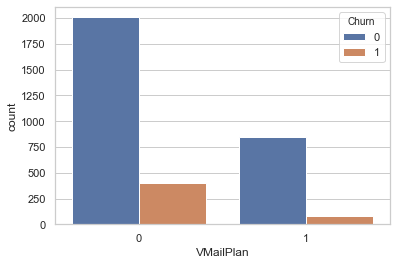

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="VMailPlan", hue="Churn", data=df.to_pandas())

#### International Plan opt by customer 

In [12]:
df['IntlPlan'].value_counts()

0    3010
1     323
Name: IntlPlan, dtype: int64

We find that 3010 customer didn't opt international plan and 323 customers opt the international plan.

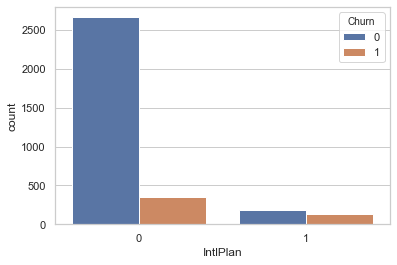

In [13]:
sns.countplot(x="IntlPlan", hue= "Churn", data=df.to_pandas())

#### Areawise churner and non-churner

In [14]:
df['AreaCode'].value_counts()

415    1655
510     840
408     838
Name: AreaCode, dtype: int64

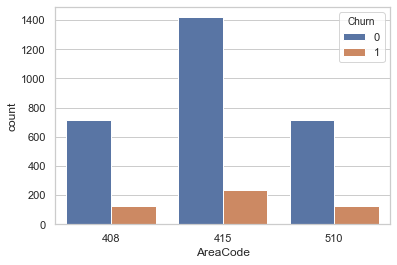

In [15]:
sns.countplot(x="AreaCode", hue= "Churn", data=df.to_pandas())

#### Correlation Matrix

In [16]:
df.corr('pearson')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
AccountLength,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMailMessage,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
DayMins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
EveMins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
NightMins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
IntlMins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServCalls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
IntlPlan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMailPlan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


### Correlation between Predicting Variable and independent variable.

Now that we want to predict which customer is going to churn, let’s see what columns might be interesting for our prediction.
One way is to find the correlation between "Churn" and each of the other columns.
This will show us which other columns might predict "Churn" the best.

In [17]:
df.corr()["Churn"]

AccountLength    0.016541
VMailMessage    -0.089728
DayMins          0.205151
EveMins          0.092796
NightMins        0.035493
IntlMins         0.068239
CustServCalls    0.208750
Churn            1.000000
IntlPlan         0.259852
VMailPlan       -0.102148
DayCalls         0.018459
DayCharge        0.205151
EveCalls         0.009233
EveCharge        0.092786
NightCalls       0.006141
NightCharge      0.035496
IntlCalls       -0.052844
IntlCharge       0.068259
AreaCode         0.006174
Name: Churn, dtype: float64

From the obtained table, we find that **Day minutes**, **Customer Serv Calls**, **Intl Plan** has weak positive correlation with predicting variable **Churn**, while **VMail Message**, **VMail Plan** and **Intl Calls** has weak negative correlation. While remaining variables has either weak positive or negative correlation. 

#### Strong Correlation lies in the range of ±0.5 to ±1

#### Weak Correlation lies in the range of ±0.1 to ±0.1

In [18]:
# drop the column phone as its not very useful for model building
df=df.drop('Phone',axis=1)

# Building Machine Learning Model


### Key components for building ML Pipeline in SPARK

#### StringIndexer
StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels), and four ordering options are supported: “frequencyDesc”: descending order by label frequency (most frequent label assigned 0), “frequencyAsc”: ascending order by label frequency (least frequent label assigned 0), “alphabetDesc”: descending alphabetical order, and “alphabetAsc”: ascending alphabetical order (default = “frequencyDesc”). The unseen labels will be put at index numLabels if user chooses to keep them. If the input column is numeric, we cast it to string and index the string values. When downstream pipeline components such as Estimator or Transformer make use of this string-indexed label, you must set the input column of the component to this string-indexed column name. In many cases, you can set the input column with setInputCol.

#### VectorIndexer
VectorIndexer helps index categorical features in datasets of Vectors. It can both automatically decide which features are categorical and convert original values to category indices. Specifically, it does the following:

Take an input column of type Vector and a parameter maxCategories.
Decide which features should be categorical based on the number of distinct values, where features with at most maxCategories are declared categorical.
Compute 0-based category indices for each categorical feature.
Index categorical features and transform original feature values to indices.
Indexing categorical features allows algorithms such as Decision Trees and Tree Ensembles to treat categorical features appropriately, improving performance.

#### VectorAssembler
VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees. VectorAssembler accepts the following input column types: all numeric types, boolean type, and vector type. In each row, the values of the input columns will be concatenated into a vector in the specified order.

## DecisionTreeClassifier

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         0.0|
|       0.0|         0.0|
|       1.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.933 
f1 of the model is 0.929192 
Feature importances:


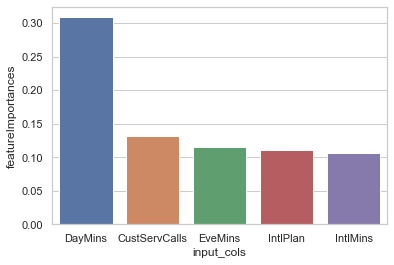

In [19]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol=labelIndexer.getOutputCol(),
                            maxBins=100,
                            featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))

print("Feature importances:" )

#get an empty list and add the featureImportances scores
Ftr_imp = []
for x in model.stages[4].featureImportances:
    Ftr_imp.append(x)
    
# get all input colum names for plotting purposesabs    
inp_cols = [
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode', 'StateIndexer'
]

#combine both lists into a dataframe
d = {'input_cols': inp_cols, 'featureImportances': Ftr_imp}
fi_df = ks.DataFrame(d)

#sort the values in descendign order 
fi_df.sort_values(by='featureImportances', ascending=False, inplace=True)

# Plot top5 important features
sns.barplot(x='input_cols',
            y='featureImportances',
            data=fi_df.head(5).to_pandas())

## RandomForestClassifier

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         1.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.924213 
f1 of the model is 0.913779 
Feature importances:


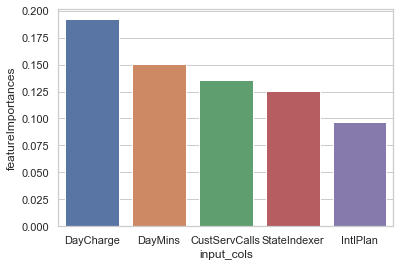

In [20]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
rf = RandomForestClassifier(labelCol=labelIndexer.getOutputCol(),
                            maxBins=100,
                            featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))


print("Feature importances:" )

#get an empty list and add the featureImportances scores
Ftr_imp = []
for x in model.stages[4].featureImportances:
    Ftr_imp.append(x)
    
# get all input colum names for plotting purposesabs    
inp_cols = [
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode', 'StateIndexer'
]

#combine both lists into a dataframe
d = {'input_cols': inp_cols, 'featureImportances': Ftr_imp}
fi_df = ks.DataFrame(d)

#sort the values in descendign order 
fi_df.sort_values(by='featureImportances', ascending=False, inplace=True)

# Plot top5 important features
sns.barplot(x='input_cols',
            y='featureImportances',
            data=fi_df.head(5).to_pandas())

## GBTClassifier

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         0.0|
|       0.0|         0.0|
|       1.0|         1.0|
|       0.0|         0.0|
|       0.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.932292 
f1 of the model is 0.931519 
Feature importances:


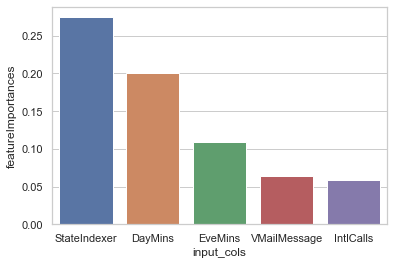

In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
gbt = GBTClassifier(labelCol=labelIndexer.getOutputCol(),
                    maxBins=100,
                    featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, gbt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))


print("Feature importances:" )

#get an empty list and add the featureImportances scores
Ftr_imp = []
for x in model.stages[4].featureImportances:
    Ftr_imp.append(x)
    
# get all input colum names for plotting purposesabs    
inp_cols = [
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode', 'StateIndexer'
]

#combine both lists into a dataframe
d = {'input_cols': inp_cols, 'featureImportances': Ftr_imp}
fi_df = ks.DataFrame(d)

#sort the values in descendign order 
fi_df.sort_values(by='featureImportances', ascending=False, inplace=True)

# Plot top5 important features
sns.barplot(x='input_cols',
            y='featureImportances',
            data=fi_df.head(5).to_pandas())

# Insights and Conclusions

1. Based on f1_score as dataset is imbalanced GBTClassifier is better performing
2. StateIndexer,DayMins,EveMins,IntlCalls,CustServCalls are important features
3. Still there is room for hyper parameter tuning and optimization using Cross Validation
4. we can understand better on which state we have more churn and then intorduce more regional offers to reduce churn
5. CustServCalls distribution should be understood between churn and non churn customers and necessary actions should be taken